This program simulates a random walk on the n-cycle.

In [1]:
## Random walk on the n-cycle
## Produces a bar graph of the proportion of time spent at each state after s steps
## and prints the total variation between the distribution of the walk after s steps 
## and the uniform distribution
#
## n = size of cycle
## p = P(X, X+1)
## s = number of steps
ncycle <- function(n, p, s) {
  q = 1-p
  numSteps <- c() #vector describing number of visits to each state
  for (i in 1:n) {
    numSteps <- c(numSteps, 0)
  }
  
  ## starting state:
  x = floor(runif(1)*n + 1)
  
  ## run the walk for s steps
  for (i in 1:s) {
    if (runif(1) < p) { #with probability p
      if (x != n) { #if the current state is not n
        x = x + 1 #move up 1
      } else { #if the current state is n
        x = 1 #move to 1
      }
    } else { #with probability 1-p
      if (x != 1) { #if the current state is not 1
        x = x - 1 #move down 1
      } else { #if the current state is 1
        x = n #move to n
      }
    }
    numSteps[x] = numSteps[x] + 1 #record the visit to the new state
  } 
  
  #Proportions: proportion of time the walk spent at each state
  Proportions <- numSteps 
  for (i in 1:length(numSteps)) {
    Proportions[i] = numSteps[i] / s 
  }
  ProportionsRounded <- Proportions #Proportions, but with each entry rounded to 3 decimal places
  for (i in 1:n) {
    ProportionsRounded[i] = round(Proportions[i], digits=3)
  }
  
  #Total variation between ending distribution and stationary distribution:
  #Stationary distribution is uniform regardless of p
  TV = 0
  for (i in 1:n) {
    TV = TV + abs(Proportions[i] - (1/n))
  }
  TV = 0.5*TV
  print(paste("Total Variation:", round(TV, digits=3)))
  
  # bar graph of the proportion of time spent at each state
  cycleplot <- barplot(ProportionsRounded, names=c(1:n), xlab="State", ylab="Proportion of steps",
          main=paste("Random walk on the", n, "cycle"))
  text(x = cycleplot, y = ProportionsRounded, label = ProportionsRounded, pos=3, cex = 0.8, col = "black")
}


Let's try a random walk on the 6-cycle for 300 steps with p=0.5:

[1] "Total Variation: 0.077"


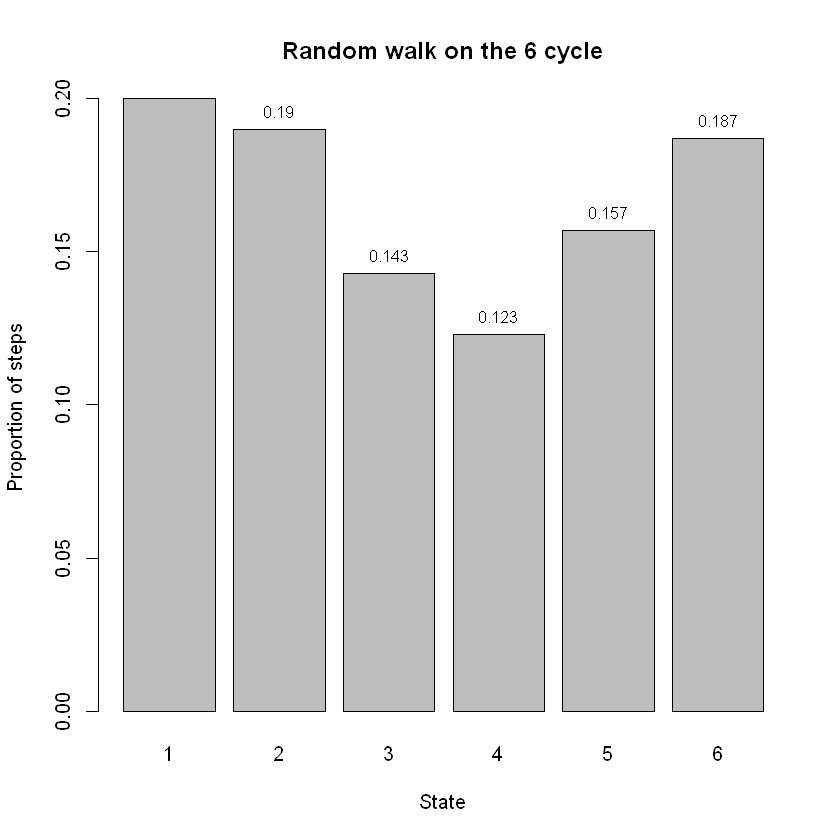

In [2]:
ncycle(6, 0.5, 300)